In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

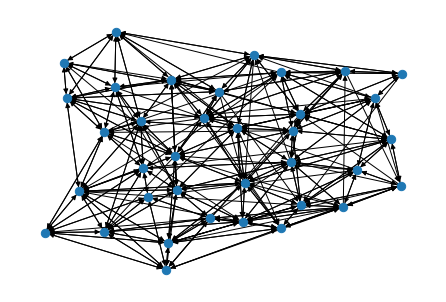

In [2]:
side = 6
sw = nx.navigable_small_world_graph(side, p=2, q=5)
options = {
#     'node_color': 'black',
    'node_size': 70,
    'width': 1,
}
nx.draw(sw, **options)

In [3]:
def vertex_num(vertex):
    return vertex[0] * 6 + vertex[1]

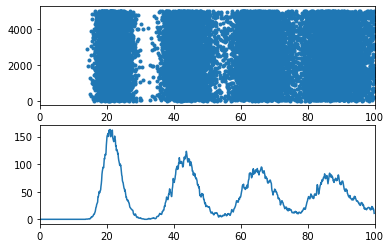

In [11]:
from brian2 import *

N = 5000
Vr = 10*mV
theta = 20*mV
tau = 20*ms
delta = 2*ms
taurefr = 2*ms
duration = .1*second
C = 1000
sparseness = float(C)/N
J = .1*mV
muext = 25*mV
sigmaext = 1*mV

eqs = """
dV/dt = (-V+muext + sigmaext * sqrt(tau) * xi)/tau : volt
"""

group = NeuronGroup(N, eqs, threshold='V>theta',
                    reset='V=Vr', refractory=taurefr, method='euler')
group.V = Vr

    
syn = Synapses(group, group, 'w : 1', on_pre='V += -J')
for edge in sw.edges:
    syn.connect(i=vertex_num(edge[0]), j=vertex_num(edge[1]))
    syn.w = 'j*0.2'




#conn = Synapses(group, group, on_pre='V += -J', delay=delta)
#conn.connect(p=sparseness)
M = SpikeMonitor(group)
LFP = PopulationRateMonitor(group)
net = Network(group, syn, M, LFP)
net.run(duration)

subplot(211)
plot(M.t/ms, M.i, '.')
xlim(0, duration/ms)

subplot(212)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)
xlim(0, duration/ms)

show()